In [1]:
import os
import cv2 
import glob 
import keras
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('keras version', keras.__version__)

2024-06-19 15:54:02.689777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 15:54:03.315551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


keras version 3.3.3


In [7]:
lista_imagenes_retina = os.listdir('../DiabeticRetinopathy')

for i in lista_imagenes_retina:
  print(i)
  imagen = cv2.imread("../DiabeticRetinopathy/"+i,0)
  imagen_escalada = cv2.resize(imagen, (1024,800), interpolation=cv2.INTER_CUBIC)
  cv2.imwrite("../grayscale/"+i, imagen_escalada)
  
#listanombres = vector


418_left.jpeg
970_left.jpeg
970_right.jpeg
971_left.jpeg
971_right.jpeg
977_left.jpeg
977_right.jpeg
978_left.jpeg
978_right.jpeg
979_left.jpeg
979_right.jpeg
980_left.jpeg
980_right.jpeg
983_left.jpeg
983_right.jpeg
985_left.jpeg
985_right.jpeg
986_left.jpeg
986_right.jpeg
987_left.jpeg
987_right.jpeg
990_left.jpeg
990_right.jpeg
992_left.jpeg
992_right.jpeg
994_left.jpeg
994_right.jpeg
997_left.jpeg
997_right.jpeg
998_left.jpeg
998_right.jpeg
99_left.jpeg
99_right.jpeg
1000_left.jpeg
1000_right.jpeg
1002_left.jpeg
100_left.jpeg
100_right.jpeg
102_left.jpeg
102_right.jpeg
104_left.jpeg
104_right.jpeg
108_left.jpeg
108_right.jpeg
10_left.jpeg
10_right.jpeg
111_left.jpeg
111_right.jpeg
114_left.jpeg
114_right.jpeg
115_right.jpeg
117_left.jpeg
117_right.jpeg
119_left.jpeg
119_right.jpeg
122_left.jpeg
122_right.jpeg
125_left.jpeg
125_right.jpeg
129_left.jpeg
129_right.jpeg
13_left.jpeg
13_right.jpeg
140_left.jpeg
140_right.jpeg
145_left.jpeg
145_right.jpeg
149_right.jpeg
155_left.jpeg
155

In [7]:
imagen.shape

(861, 1024)

In [8]:
etiquetas = []
imagenes_retina = np.zeros([ len(lista_imagenes_retina), 800, 1024])

contador = 0
for i in lista_imagenes_retina:
  print(i)
  imagen = cv2.imread("../grayscale/"+i,0)
  tam = imagen.shape
  #resultado[contador,:tam[0],:tam[1]] = imagen
  imagenes_retina[contador, :, :]= imagen
  contador = contador + 1
print(len(imagenes_retina))

1000_left.jpeg
1000_right.jpeg
1002_left.jpeg
100_left.jpeg
100_right.jpeg
102_left.jpeg
102_right.jpeg
104_left.jpeg
104_right.jpeg
108_left.jpeg
108_right.jpeg
10_left.jpeg
10_right.jpeg
111_left.jpeg
111_right.jpeg
114_left.jpeg
114_right.jpeg
115_left.jpeg
115_right.jpeg
117_left.jpeg
117_right.jpeg
119_left.jpeg
119_right.jpeg
122_left.jpeg
122_right.jpeg
125_left.jpeg
125_right.jpeg
129_left.jpeg
129_right.jpeg
13_left.jpeg
13_right.jpeg
140_left.jpeg
140_right.jpeg
145_left.jpeg
145_right.jpeg
149_left.jpeg
149_right.jpeg
155_left.jpeg
155_right.jpeg
156_left.jpeg
156_right.jpeg
157_left.jpeg
157_right.jpeg
159_left.jpeg
159_right.jpeg
15_left.jpeg
15_right.jpeg
161_left.jpeg
161_right.jpeg
162_left.jpeg
162_right.jpeg
163_left.jpeg
163_right.jpeg
164_left.jpeg
164_right.jpeg
167_left.jpeg
167_right.jpeg
169_left.jpeg
169_right.jpeg
16_left.jpeg
16_right.jpeg
170_left.jpeg
170_right.jpeg
172_left.jpeg
172_right.jpeg
174_left.jpeg
174_right.jpeg
177_left.jpeg
177_right.jpeg
178_l

In [9]:
etiquetas = pd.read_csv("../etiquetas/trainLabels_cropped.csv")
print(etiquetas)
etiquetas ["image"] [384]
niveles = etiquetas["level"]
busqueda = etiquetas["image"]
busqueda[busqueda=="438_right"].index[0]

       Unnamed: 0.1  Unnamed: 0        image  level
0                 0           0      10_left      0
1                 1           1     10_right      0
2                 2           2      13_left      0
3                 3           3     13_right      0
4                 4           4      15_left      1
...             ...         ...          ...    ...
35103         35104       35121  44347_right      0
35104         35105       35122   44348_left      0
35105         35106       35123  44348_right      0
35106         35107       35124   44349_left      0
35107         35108       35125  44349_right      1

[35108 rows x 4 columns]


383

In [10]:

#barrido de vector 
#quitar la extencion
#preguntar en que indice de busqueda esta el nombre de la imagen 
#consultar el indice 
#meter a la lista el indice

lista_etiquetas= []
for i in lista_imagenes_retina:
  recorrer = i[0:-5]
  #print(recorrer)
  indice= busqueda[busqueda==recorrer].index[0]
  print(indice)
  nivel = niveles[indice]
  print(nivel)
  lista_etiquetas.append(nivel)

821
0
822
0
823
3
92
0
93
0
94
0
95
0
96
0
97
0
98
0
99
0
0
0
1
0
100
0
101
0
102
1
103
1
104
0
105
0
106
0
107
0
108
0
109
0
110
0
111
0
112
0
113
0
114
2
115
2
2
0
3
0
116
0
117
0
118
0
119
0
120
0
121
0
122
0
123
2
124
0
125
0
126
0
127
0
128
0
129
0
4
1
5
2
130
0
131
0
132
0
133
0
134
3
135
3
136
0
137
0
138
0
139
0
140
0
141
0
6
4
7
4
142
0
143
0
144
2
145
2
146
0
147
0
148
0
149
0
150
1
151
1
152
0
153
0
8
0
9
1
154
2
155
2
156
0
157
0
158
0
159
0
160
2
161
2
162
0
163
0
164
2
165
2
166
0
167
0
168
0
169
0
10
0
11
0
170
0
171
0
172
0
173
1
174
0
175
0
12
0
13
0
176
0
177
0
178
0
179
0
180
1
181
0
182
0
183
0
184
4
185
4
186
0
187
0
188
2
189
0
14
0
15
0
190
0
191
0
192
0
193
0
194
0
195
0
196
1
197
0
198
0
199
2
16
0
17
0
200
1
201
0
202
0
203
0
204
0
205
0
206
0
207
0
208
2
209
2
18
0
19
0
210
0
211
1
212
0
213
0
214
0
215
0
216
0
217
0
218
0
219
0
220
0
221
0
222
0
223
0
224
2
225
2
226
0
227
0
228
0
229
0
20
0
21
0
230
0
231
0
232
0
233
0
234
2
235
2
236
0
237
0
238
0
239
0
24

In [11]:
imagenes_retina.shape

(824, 800, 1024)

In [12]:
imagenes_retina.shape

(824, 800, 1024)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


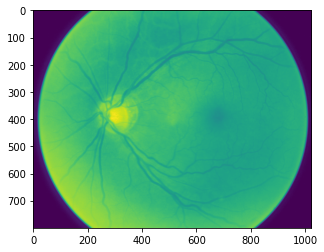

In [20]:
#entrenar neurona
labels = np.array(lista_etiquetas)
train = np.array(imagenes_retina)
print(train[0])
mostrar = plt.imshow(train[1])

onehot = to_categorical(labels, num_classes=len(np.unique(labels)))
#print(labels[1])

In [22]:
# Dividir los datos en entrenamiento (70%) y validación (30%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.3)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]

train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

print('Forma de datos de Entrenamiento=', train.shape , '\nForma de datos de Test=', test.shape)




Forma de datos de Entrenamiento= (577, 800, 1024, 1) 
Forma de datos de Test= (247, 800, 1024, 1)


In [23]:
train.shape
train[0].shape
type(train)

numpy.ndarray

In [29]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import Convolution2D as Conv2D

model = Sequential()

model.add(Conv2D(4,(5,5),activation = 'relu', input_shape=(800, 1024,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 796, 1020, 4)      104       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 398, 510, 4)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 811920)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                25981472  
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                      

In [31]:

from tensorflow.keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',  
                optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                metrics=['accuracy'])



history = model.fit(train,onehot_train,
            epochs=100,
            batch_size=128,
            validation_data= (test,onehot_test),
            verbose=1
            )

Epoch 1/100
5/5 [==============================] - 49s 9s/step - loss: 24.0103 - accuracy: 0.5997 - val_loss: 1.2892 - val_accuracy: 0.7449
Epoch 2/100
5/5 [==============================] - 44s 9s/step - loss: 1.1104 - accuracy: 0.7591 - val_loss: 0.8686 - val_accuracy: 0.7449
Epoch 3/100
5/5 [==============================] - 44s 9s/step - loss: 0.9198 - accuracy: 0.7591 - val_loss: 0.9619 - val_accuracy: 0.7449
Epoch 4/100
5/5 [==============================] - 45s 9s/step - loss: 1.0187 - accuracy: 0.7591 - val_loss: 0.9326 - val_accuracy: 0.7449
Epoch 5/100
5/5 [==============================] - 44s 9s/step - loss: 0.9964 - accuracy: 0.7591 - val_loss: 0.8688 - val_accuracy: 0.7449
Epoch 6/100
5/5 [==============================] - 44s 9s/step - loss: 0.9122 - accuracy: 0.7591 - val_loss: 0.8790 - val_accuracy: 0.7449
Epoch 7/100
5/5 [==============================] - 44s 9s/step - loss: 0.9390 - accuracy: 0.7591 - val_loss: 0.8659 - val_accuracy: 0.7449
Epoch 8/100
5/5 [=========

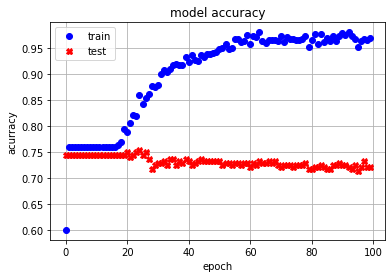

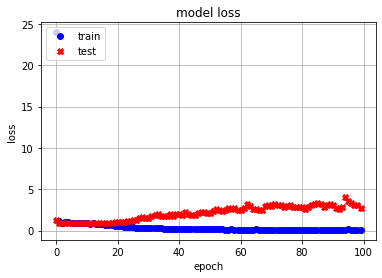

In [34]:
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.title('model accuracy')
plt.ylabel('acurracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'rX')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.grid()
plt.show()
